In [1]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import holodeck as holo
import holodeck.single_sources as ss
import holodeck.cyutils as cy
import matplotlib.pyplot as plt

### grid:

1x  |  xx  |  xx  |  xx  |  xx \
xx  |  9x  |  x3  |  xx  |  xx \
xx  |  xx  |  xx  |  x4  |  x5 

10x  |  x80   |  xx   |  xx   |  xx \
xx   |  xx  |  x30  |  xx   |  xx \
xx   |  xx   |  xx   |  x40  |  x50 

In [6]:
hsamp = np.array([[[[[1,10],[0,80],[0,6],[0,6],[0,6]],
                [[0,6],[9,6],[0,6],[0,6],[0,6]],
                [[0,6],[0,6],[0,6],[0,6],[0,6]]]],

                [[[[0,6],[0,6],[0,6],[0,6],[0,6]],
                [[0,6],[0,6],[3,30],[0,6],[0,6]],
                [[0,6],[0,6],[0,6],[4,40],[5,50]]]]])
bgnum = np.full_like(hsamp, 100)

print(hsamp.shape)
print(bgnum.shape)
# print(grid)
hsone=hsamp[...,0]
print(hsone.shape)

(2, 1, 3, 5, 2)
(2, 1, 3, 5, 2)
(2, 1, 3, 5)


In [246]:
repped = np.repeat(hsone[...,np.newaxis],2,axis=4)
print(repped.shape)

(2, 1, 3, 5, 2)


In [7]:
# one real
hsmax = np.amax(hsone, axis=(0,1,2))
shape = hsone.shape
print(shape)
newshape = (shape[0]*shape[1]*shape[2], shape[3])
print(newshape)
hsone = hsone.reshape(newshape) # change hsamp to shape (M-1*Q-1*Z-1, F-1)
argmax = np.argmax(hsone, axis=0) # max at each frequency & realization
hsone = hsone.reshape(shape) # restore hsamp shape to (M-1, Q-1, Z-1, F-1)
print(hsone.shape)
mqz = np.array(np.unravel_index(argmax, shape[:-1])) # unravel indices
print('mqz', mqz.shape)
print(mqz)
f_ids = np.linspace(0,len(mqz[0])-1,len(mqz[0])).astype(int) # frequency indices
print(np.append(mqz, f_ids))
ssnew = np.append(mqz, f_ids).reshape(4,len(f_ids))
print('ssnew', ssnew)
# print(hsone[ssnew[0], ssnew[1], ssnew[2], ssnew[3]])

(2, 1, 3, 5)
(6, 5)
(2, 1, 3, 5)
mqz (3, 5)
[[0 0 1 1 1]
 [0 0 0 0 0]
 [0 1 1 2 2]]
[0 0 1 1 1 0 0 0 0 0 0 1 1 2 2 0 1 2 3 4]
ssnew [[0 0 1 1 1]
 [0 0 0 0 0]
 [0 1 1 2 2]
 [0 1 2 3 4]]


In [217]:
#hsamp for all bins at all realizations

#gets max for each frequency and realization
max = np.amax(hsamp, axis=(0,1,2))
print(max)
shape = hsamp.shape
print('shape',shape)
newshape = (shape[0]*shape[1]*shape[2], shape[3], shape[4])
print('newshape', newshape)
hsamp = hsamp.reshape(newshape)
argmax = np.argmax(hsamp, axis=0)
hsamp = hsamp.reshape(shape)

# shape (3, F, R)
mqz = np.array(np.unravel_index(argmax, shape[:-2])) # unravel indices
print('mqz', mqz.shape)


# I GOt IT!!!!!
# MQZ in shape (3,F,R)
# Want to get MQZF in shape (4,F,R)
# Need f_ids in shape (1,F,R) to append

f_ids = np.linspace(0,len(mqz[0])-1,len(mqz[0])).astype(int) # frequency indices
f_ids = np.repeat(f_ids, R).reshape(F,R)[np.newaxis,:]
ssnew = np.append(mqz,f_ids, axis=0)
print(ssnew, ssnew.shape)

[[ 1 10]
 [ 9 80]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
shape (2, 1, 3, 5, 2)
newshape (6, 5, 2)
mqz (3, 5, 2)
[[[0 0]
  [0 0]
  [1 1]
  [1 1]
  [1 1]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [1 0]
  [1 1]
  [2 2]
  [2 2]]

 [[0 0]
  [1 1]
  [2 2]
  [3 3]
  [4 4]]] (4, 5, 2)


In [184]:
# print(hsamp[ssnew[0,:,0], ssnew[1,:,0], ssnew[2,:,0], 
#         ssnew[3,:,0]][...,0])
# print(hsamp[ssnew[0,:,1], ssnew[1,:,1], ssnew[2,:,1], 
#         ssnew[3,:,1]][...,1])
print(hsamp.shape)
print(ssnew.shape)
ampmax=hsamp[ssnew[0,], ssnew[1], ssnew[2], 
        ssnew[3]].squeeze()
ampmax2 = hsamp[tuple(ssnew)]
# why does this give me duplicates??
print(ampmax.shape)
print(ampmax)
print(max.shape)
print(max)

(2, 1, 3, 5, 2)
(4, 5, 2)
(5, 2, 2)
[[[ 1 10]
  [ 1 10]]

 [[ 9  6]
  [ 0 80]]

 [[ 3 30]
  [ 3 30]]

 [[ 4 40]
  [ 4 40]]

 [[ 5 50]
  [ 5 50]]]
(5, 2)
[[ 1 10]
 [ 9 80]
 [ 3 30]
 [ 4 40]
 [ 5 50]]


include r indices calculation

In [224]:
# include also r indices: 
# Only way to avoid for loops over realizations?
#hsamp for all bins at all realizations

#gets max for each frequency and realization
max = np.amax(hsamp, axis=(0,1,2))
print(max)
shape = hsamp.shape
print('shape',shape)
newshape = (shape[0]*shape[1]*shape[2], shape[3], shape[4])
print('newshape', newshape)
hsamp = hsamp.reshape(newshape)
argmax = np.argmax(hsamp, axis=0)
hsamp = hsamp.reshape(shape)

# shape (3, F, R)
mqz = np.array(np.unravel_index(argmax, shape[:-2])) # unravel indices
# print('mqz', mqz.shape)

# MQZ in shape (3,F,R)
# Want to get MQZF in shape (4,F,R)
# Need f_ids in shape (1,F,R) to append
# Need r_ids in shape (1,F,R) to append
R=shape[4]
F=shape[3]
print('R =', R, 'F =',F)
f_ids = np.linspace(0,len(mqz[0])-1,len(mqz[0])).astype(int) # frequency indices
f_ids = np.repeat(f_ids, R).reshape(F,R)[np.newaxis,:]
r_ids = np.linspace(0,R-1,R).astype(int) # realization indices
print(r_ids)
r_ids = np.tile(r_ids, F).reshape(F,R)[np.newaxis,:]
print(r_ids, r_ids.shape)
ssnew = np.append(mqz,f_ids, axis=0)
ssnew = np.append(ssnew,r_ids, axis=0)
print(ssnew.shape)

[[ 1 10]
 [ 9 80]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
shape (2, 1, 3, 5, 2)
newshape (6, 5, 2)
R = 2 F = 5
[0 1]
[[[0 1]
  [0 1]
  [0 1]
  [0 1]
  [0 1]]] (1, 5, 2)
(5, 5, 2)


In [237]:
print(max.shape)

(5, 2)


In [225]:
print(hsamp[ssnew[0], ssnew[1], ssnew[2], ssnew[3], ssnew[4]])

[[ 1 10]
 [ 9 80]
 [ 3 30]
 [ 4 40]
 [ 5 50]]


In [200]:
print(ssnew[0,0,0], ssnew[0,0,0].shape)
# mass index of all freqs, all reals
print(bgnum.shape)
print(bgnum[ssnew[0,0,0], ssnew[1,0,0], ssnew[2,0,0], ssnew[3,0,0],0])

0 ()
(2, 1, 3, 5, 2)
100


bgnum

In [235]:
r=1
print(bgnum[...,r], bgnum.shape)
print(hsamp.shape)
print(hsamp[ssnew[0], ssnew[1], ssnew[2], 
        ssnew[3],ssnew[4]][...,r])
bgnumcop = np.copy(bgnum)
# bgnumcop[ssnew[0,:,:], ssnew[1,:,:], ssnew[2,:,:], ssnew[3,:,:]]=9
bgnumcop[[ssnew[0], ssnew[1], ssnew[2], ssnew[3], ssnew[4]]]-=1
print(bgnumcop[...,r], bgnumcop.shape)

[[[[100 100 100 100 100]
   [100 100 100 100 100]
   [100 100 100 100 100]]]


 [[[100 100 100 100 100]
   [100 100 100 100 100]
   [100 100 100 100 100]]]] (2, 1, 3, 5, 2)
(2, 1, 3, 5, 2)
[10 80 30 40 50]
[[[[ 99  99 100 100 100]
   [100 100 100 100 100]
   [100 100 100 100 100]]]


 [[[100 100 100 100 100]
   [100 100  99 100 100]
   [100 100 100  99  99]]]] (2, 1, 3, 5, 2)


/var/folders/r0/rzjvt8tn7lqbr892wvvnr0j40000gn/T/ipykernel_28871/2073731583.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bgnumcop[[ssnew[0], ssnew[1], ssnew[2], ssnew[3], ssnew[4]]]-=1


old arrs stuff

In [64]:
arr = np.array([[[1,1], [2,2], [3,3]]])
print(arr, arr.shape)
app = np.array([[[0], [5], [6]]])
print(app, app.shape)
res = np.append(arr, app, axis=2)
print(res, res.shape)

# take shape (a,b,c) and append shape (a,b,d) to get shape (a,b,c+d)

[[[1 1]
  [2 2]
  [3 3]]] (1, 3, 2)
[[[0]
  [5]
  [6]]] (1, 3, 1)
[[[1 1 0]
  [2 2 5]
  [3 3 6]]] (1, 3, 3)


In [81]:
arr = np.array([[1],[2],[3]])
print(arr, arr.shape)
app = np.array([[0],[0],[3]])
print(app, app.shape)
res = np.append(arr, app, axis=1)
print(res, res.shape)

# take shape (a,b,c) and append shape (a,b,d) to get shape (a,b,c+d)
# I have shape (3,5,2) and I want to append ..... 
# to get shape (4,5,2)

[[1]
 [2]
 [3]] (3, 1)
[[0]
 [0]
 [3]] (3, 1)
[[1 0]
 [2 0]
 [3 3]] (3, 2)


In [89]:
arr = np.array([[1,2],[3,4]])
print(arr, arr.shape)
app = np.array([[0,0]])
print(app, app.shape)
res = np.append(arr, app, axis=0)
print(res, res.shape)

# take shape (a,b,c) and append shape (a,b,d) to get shape (a,b,c+d)
# I have shape (3,5,2) and I want to append ..... 
# to get shape (4,5,2)

[[1 2]
 [3 4]] (2, 2)
[[0 0]] (1, 2)
[[1 2]
 [3 4]
 [0 0]] (3, 2)


In [86]:
arr = np.array([[1,2],[3,4]])
print(arr, arr.shape)
app = np.array([[0],[0]])
print(app, app.shape)
res = np.append(arr, app, axis=1)
print(res, res.shape)

# take shape (a,b,c) and append shape (a,b,d) to get shape (a,b,c+d)
# I have shape (3,5,2) and I want to append ..... 
# to get shape (4,5,2)

[[1 2]
 [3 4]] (2, 2)
[[0]
 [0]] (2, 1)
[[1 2 0]
 [3 4 0]] (2, 3)


In [101]:
arr = np.array([[[1],[2]],[[3],[4]],[[5],[6]]])
print(arr, arr.shape)
app = np.array([[[0],[0]]])
print(app, app.shape)
res = np.append(arr, app, axis=0)
print(res, res.shape)

# take shape (a,b,c) and append shape (a,b,d) to get shape (a,b,c+d)
# I have shape (3,5,2) and I want to append ..... 
# to get shape (4,5,2)

[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]] (3, 2, 1)
[[[0]
  [0]]] (1, 2, 1)
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]

 [[0]
  [0]]] (4, 2, 1)


In [127]:
print(mqz.shape) # mqz is shape (3,5,2) = (3,F,R)
# I want to append frequencies to get shape (4,5,2) = (4,F,R)
# this means I need my f_indices in shape (1,5,2)
print(f_ids.shape)
print(f_ids[np.newaxis,:,np.newaxis].shape)
print(np.tile(f_ids, (1,2)))
print(np.repeat(f_ids, 2).reshape(5,2).shape)

(3, 5, 2)
(5,)
(1, 5, 1)
[[0 1 2 3 4 0 1 2 3 4]]
(5, 2)


In [131]:
R = 2
F = 5
reps = np.repeat(f_ids, R).reshape(F,R)
resh = reps[np.newaxis,:]
print(resh)
print(resh.shape)

[[[0 0]
  [1 1]
  [2 2]
  [3 3]
  [4 4]]]
(1, 5, 2)


f appending

In [136]:
# I GOt IT!!!!!
# MQZ in shape (3,F,R)
# Want to get MQZF in shape (4,F,R)
# Need f_ids in shape (1,F,R) to append

f_ids = np.linspace(0,len(mqz[0])-1,len(mqz[0])).astype(int) # frequency indices
f_ids = np.repeat(f_ids, R).reshape(F,R)[np.newaxis,:]
mqzf = np.append(mqz,f_ids, axis=0)
print(mqzf.shape)

(4, 5, 2)


single realization

In [105]:
hsamp = np.array([[[[1,0,0,0,0],[0,9,0,0,0],[0,0,0,0,0]]],

                 [[[0,0,0,0,0],[0,0,3,0,0],[0,0,0,4,5]]]])[...,np.newaxis]
print(hsamp.shape)
bgnum = np.full_like(hsamp, 100)


(2, 1, 3, 5, 1)


In [260]:
# include also r indices: 
# Only way to avoid for loops over realizations?
#hsamp for all bins at all realizations

#gets max for each frequency and realization
max = np.amax(hsamp, axis=(0,1,2))
print(max)
shape = hsamp.shape
print('shape',shape)
newshape = (shape[0]*shape[1]*shape[2], shape[3], shape[4])
print('newshape', newshape)
hsamp = hsamp.reshape(newshape)
argmax = np.argmax(hsamp, axis=0)
hsamp = hsamp.reshape(shape)

# shape (3, F, R)
mqz = np.array(np.unravel_index(argmax, shape[:-2])) # unravel indices
# print('mqz', mqz.shape)

# MQZ in shape (3,F,R)
# Want to get MQZF in shape (4,F,R)
# Need f_ids in shape (1,F,R) to append
# Need r_ids in shape (1,F,R) to append
R=shape[4]
F=shape[3]
print('R =', R, 'F =',F)
f_ids = np.linspace(0,len(mqz[0])-1,len(mqz[0])).astype(int) # frequency indices
f_ids = np.repeat(f_ids, R).reshape(F,R)[np.newaxis,:]
print('f_ids',f_ids, f_ids.shape)
r_ids = np.linspace(0,R-1,R).astype(int) # realization indices
print('r_ids',r_ids,r_ids.shape)
r_ids = np.tile(r_ids, F).reshape(F,R)[np.newaxis,:]
print(r_ids, r_ids.shape)
ssnew = np.append(mqz,f_ids, axis=0)
ssnew = np.append(ssnew,r_ids, axis=0)
print(ssnew.shape)

[[1]
 [9]
 [3]
 [4]
 [5]]
shape (2, 1, 3, 5, 1)
newshape (6, 5, 1)
R = 1 F = 5
f_ids [[[0]
  [1]
  [2]
  [3]
  [4]]] (1, 5, 1)
r_ids [0] (1,)
[[[0]
  [0]
  [0]
  [0]
  [0]]] (1, 5, 1)
(5, 5, 1)


In [257]:
print(ssnew)

[[[0]
  [0]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [1]
  [1]
  [2]
  [2]]

 [[0]
  [1]
  [2]
  [3]
  [4]]

 [[0]
  [0]
  [0]
  [0]
  [0]]]


In [256]:
r=0
print(bgnum[...,r], bgnum.shape)
print(hsamp.shape)
print(hsamp[ssnew[0], ssnew[1], ssnew[2], 
        ssnew[3],ssnew[4]][...,r])
bgnumcop = np.copy(bgnum)
# bgnumcop[ssnew[0,:,:], ssnew[1,:,:], ssnew[2,:,:], ssnew[3,:,:]]=9
bgnumcop[[ssnew[0], ssnew[1], ssnew[2], ssnew[3], ssnew[4]]]-=1
print(bgnumcop, bgnumcop.shape)

[[[[100 100 100 100 100]
   [100 100 100 100 100]
   [100 100 100 100 100]]]


 [[[100 100 100 100 100]
   [100 100 100 100 100]
   [100 100 100 100 100]]]] (2, 1, 3, 5, 1)
(2, 1, 3, 5, 1)
[1 9 3 4 5]
[[[[[ 99]
    [100]
    [100]
    [100]
    [100]]

   [[100]
    [ 99]
    [100]
    [100]
    [100]]

   [[100]
    [100]
    [100]
    [100]
    [100]]]]



 [[[[100]
    [100]
    [100]
    [100]
    [100]]

   [[100]
    [100]
    [ 99]
    [100]
    [100]]

   [[100]
    [100]
    [100]
    [ 99]
    [ 99]]]]] (2, 1, 3, 5, 1)


/var/folders/r0/rzjvt8tn7lqbr892wvvnr0j40000gn/T/ipykernel_28871/70686756.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bgnumcop[[ssnew[0], ssnew[1], ssnew[2], ssnew[3], ssnew[4]]]-=1


# From ss_real_dev 3/10

## Scratch

grid:

1x  |  xx  |  xx  |  xx  |  xx \
xx  |  9x  |  x3  |  xx  |  xx \
xx  |  xx  |  xx  |  x4  |  x5 

In [7]:
grid = np.array([[[[1,0,0,0,0],[0,9,0,0,0],[0,0,0,0,0]]],
                 [[[0,0,0,0,0],[0,0,3,0,0],[0,0,0,4,5]]]])
print(grid.shape)
mqz_f, f_mqz, all_f, f_all= max_index_at_f(grid)
print('mqz_f:\n',mqz_f)
print('\nf_mqz:\n', f_mqz)
print('\nall_f:\n', all_f)
print('\nf_all:\n', f_all)

(2, 1, 3, 5)


NameError: name 'max_index_at_f' is not defined

In [ ]:
maxes = np.amax(grid, axis=(0,1,2))
print(maxes)

hsmax = np.amax(grid, axis=(0,1,2)) #find max hs at each frequency
    
    #### 2) Record the indices and strain of that single source

# --- Indices of Loudest Bin ---
# Shape [F, 4], looks like
# [[m_idx,q_idx,z_idx,0],
#  [m_idx,q_idx,z_idx,1],
#   ........
#  [m_idx,q_idx,z_idx,F-2]]
ssidx = np.argwhere(grid==hsmax) 
for s in range(len(ssidx)):
    m,q,z,f = ssidx[s]
    print(m,q,z,f, 'grid max:',grid[m,q,z,f])
print(ssidx)

[1 9 3 4 5]
0 0 0 0 grid max: 1
0 0 1 1 grid max: 9
1 0 1 2 grid max: 3
1 0 2 3 grid max: 4
1 0 2 4 grid max: 5
[[0 0 0 0]
 [0 0 1 1]
 [1 0 1 2]
 [1 0 2 3]
 [1 0 2 4]]


grid: argwhere vs where

In [ ]:
where = np.where(grid==hsmax)
where_arr = np.array([*where])
argwhere = np.argwhere(grid==hsmax)
print('where:\n', where)
print('np.where unpacked and put in numpy array\n', where_arr)
print('argwhere:\n', argwhere)
print('first point', argwhere[0,:], where_arr[:,0])
for f in range(len(argwhere)):
    print('f: by np.array[*where][:,f]', where_arr[:,f],  
          'or by argwhere[f,:]', argwhere[f,:])

where:
 (array([0, 0, 1, 1, 1]), array([0, 0, 0, 0, 0]), array([0, 1, 1, 2, 2]), array([0, 1, 2, 3, 4]))
np.where unpacked and put in numpy array
 [[0 0 1 1 1]
 [0 0 0 0 0]
 [0 1 1 2 2]
 [0 1 2 3 4]]
argwhere:
 [[0 0 0 0]
 [0 0 1 1]
 [1 0 1 2]
 [1 0 2 3]
 [1 0 2 4]]
first point [0 0 0 0] [0 0 0 0]
f: by np.array[*where][:,f] [0 0 0 0] or by argwhere[f,:] [0 0 0 0]
f: by np.array[*where][:,f] [0 0 1 1] or by argwhere[f,:] [0 0 1 1]
f: by np.array[*where][:,f] [1 0 1 2] or by argwhere[f,:] [1 0 1 2]
f: by np.array[*where][:,f] [1 0 2 3] or by argwhere[f,:] [1 0 2 3]
f: by np.array[*where][:,f] [1 0 2 4] or by argwhere[f,:] [1 0 2 4]


grid: using reshape

In [ ]:
shape = grid.shape
print(shape)
print(grid)
grid = grid.reshape(6,5)
print(grid.shape)
print(grid)
grid = grid.reshape(shape)
print(grid.shape)
print(grid)

(2, 1, 3, 5)
[[[[1 0 0 0 0]
   [0 9 0 0 0]
   [0 0 0 0 0]]]


 [[[0 0 0 0 0]
   [0 0 3 0 0]
   [0 0 0 4 5]]]]
(6, 5)
[[1 0 0 0 0]
 [0 9 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 5]]
(2, 1, 3, 5)
[[[[1 0 0 0 0]
   [0 9 0 0 0]
   [0 0 0 0 0]]]


 [[[0 0 0 0 0]
   [0 0 3 0 0]
   [0 0 0 4 5]]]]


In [ ]:
shape = (2,1,3,5)
print(shape[:-1])
grid = grid.reshape(shape)
# print('grid:', grid.shape,'\n', grid)
grid = grid.reshape(6,5)
print('grid:', grid.shape,'\n', grid)
# print('grid[4,2]', grid[4,2])

argmax0 = np.argmax(grid,axis=0)
# argmax1 = np.argmax(grid,axis=1)
# unraveledargmax = np.unravel_index(argmax, grid.shape)
print('argmax0:', argmax0.shape, argmax0)
for i in range(len(grid[0])):
    print('argmax[i]=',argmax0[i], 
          'i=', i, 
          'grid[argmax[i], i]] =', grid[argmax0[i], i])
# print('argmax1:', argmax1.shape, argmax1)

# print('unraveled:', unraveledargmax)
# print('max at argmax:', grid[:,argmax])
# argidx = np.unravel_index(argmax, grid.shape)
print('grid[argmax,:]\n', grid[argmax0,:])
# print('grid[:,argmax]\n', grid[:,argmax0])
grid = grid.reshape(shape)
unraveled = np.unravel_index(argmax0, shape[:-1])
print('unraveled', len(unraveled), unraveled[0].shape, unraveled)
for i in range(len(grid[0,0,0,:])):
    m,q,z= unraveled[0][i], unraveled[1][i], unraveled[2][i] #, unraveled[3][i]
    print('unraveled[:,i] m,q,z,f = ', m,q,z,i)
    print(grid[m,q,z,i])
    # print('argmax[i]=',argmax0[i], 
    #       'i=', i, 
    #       'grid[argmax[i], i]] =', grid[n,q,z, i])

# print('grid:', grid.shape,'\n', grid)



(2, 1, 3)
grid: (6, 5) 
 [[1 0 0 0 0]
 [0 9 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 5]]
argmax0: (5,) [0 1 4 5 5]
argmax[i]= 0 i= 0 grid[argmax[i], i]] = 1
argmax[i]= 1 i= 1 grid[argmax[i], i]] = 9
argmax[i]= 4 i= 2 grid[argmax[i], i]] = 3
argmax[i]= 5 i= 3 grid[argmax[i], i]] = 4
argmax[i]= 5 i= 4 grid[argmax[i], i]] = 5
grid[argmax,:]
 [[1 0 0 0 0]
 [0 9 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 5]
 [0 0 0 4 5]]
unraveled 3 (5,) (array([0, 0, 1, 1, 1]), array([0, 0, 0, 0, 0]), array([0, 1, 1, 2, 2]))
unraveled[:,i] m,q,z,f =  0 0 0 0
1
unraveled[:,i] m,q,z,f =  0 0 1 1
9
unraveled[:,i] m,q,z,f =  1 0 1 2
3
unraveled[:,i] m,q,z,f =  1 0 2 3
4
unraveled[:,i] m,q,z,f =  1 0 2 4
5


figured out how to use my faster mqz indexing to get maxes from grid, with fancy indexing

In [ ]:
mqz = reshaped_argmax_at_f(grid)
print(mqz)
mqzf = mqzf_from_mqz(mqz, True)
print(mqzf)

[[0 0 1 1 1]
 [0 0 0 0 0]
 [0 1 1 2 2]]
f_indices [0 1 2 3 4]
m,q,z,f 0 0 0 0
grid[m,q,z,f] = 1
m,q,z,f 0 0 1 1
grid[m,q,z,f] = 9
m,q,z,f 1 0 1 2
grid[m,q,z,f] = 3
m,q,z,f 1 0 2 3
grid[m,q,z,f] = 4
m,q,z,f 1 0 2 4
grid[m,q,z,f] = 5
mqzf (5, 4) 
 [[0 0 0 0]
 [0 0 1 1]
 [1 0 1 2]
 [1 0 2 3]
 [1 0 2 4]]
[[0 0 0 0]
 [0 0 1 1]
 [1 0 1 2]
 [1 0 2 3]
 [1 0 2 4]]


In [5]:
testarr = np.array([[0,0],[-1,-2],[3,4]])
print(testarr)
sorted = np.sort(testarr, axis=0)
print(sorted)

[[ 0  0]
 [-1 -2]
 [ 3  4]]
[[-1 -2]
 [ 0  0]
 [ 3  4]]


sort over all M,q,z for each individual F and R
np.sort( axis?)

* keep F and R indices separated

In [ ]:
faster = faster_mqzf_from_mqz(mqz, False)
print('faster:', faster)
print(grid.shape)
print('1st max at m,q,z,f = 0,0,0,0:', grid[0,0,0,0])
print('2nd max at m,q,z,f = 0,0,1,1:', grid[0,0,1,1])
print('3rd max at m,q,z,f = 1,0,1,2:', grid[1,0,1,2])
print('4th max at m,q,z,f = 1,0,2,3:', grid[1,0,2,3])
print('5th max at m,q,z,f = 1,0,2,4:', grid[1,0,2,4])
print(grid[[0,0,1,1,1], [0,0,0,0,0], [0,1,1,2,2], [0,1,2,3,4]])
fancy = [0,0,1,1,1], [0,0,0,0,0], [0,1,1,2,2], [0,1,2,3,4]
print('grid[fancy] =',grid[fancy])
print('fancy:', fancy)
print(grid[faster[0], faster[1], faster[2], faster[3]]) # this gives maxes!!! 

# listed = (faster[0], faster[1], faster[2], faster[3])
# print(listed)


faster: [[0 0 1 1 1]
 [0 0 0 0 0]
 [0 1 1 2 2]
 [0 1 2 3 4]]
(2, 1, 3, 5)
1st max at m,q,z,f = 0,0,0,0: 1
2nd max at m,q,z,f = 0,0,1,1: 9
3rd max at m,q,z,f = 1,0,1,2: 3
4th max at m,q,z,f = 1,0,2,3: 4
5th max at m,q,z,f = 1,0,2,4: 5
[1 9 3 4 5]
grid[fancy] = [1 9 3 4 5]
fancy: ([0, 0, 1, 1, 1], [0, 0, 0, 0, 0], [0, 1, 1, 2, 2], [0, 1, 2, 3, 4])
[1 9 3 4 5]


using reshaped argmax, and mqzf to mqz methods

In [ ]:
# this is what mqz looks like
# all [[M indices], [q indices], [z indices]] in shape (3,F)
arr = np.array([[1,2,3,4,5], [10,20,30,40,50], [100,200,300,400,500]])
print(np.array(arr).shape)
# Here are the F indices
indices = np.array([0,1,2,3,4])

# I'd like to get this in the shape (4,F):
# [array of M indices, array of q indices, array of z indices]
newarr = np.append(arr,indices).reshape(4,len(indices))
print(newarr)

(3, 5)
[[  1   2   3   4   5]
 [ 10  20  30  40  50]
 [100 200 300 400 500]
 [  0   1   2   3   4]]


apply to example 3

In [ ]:
edges, number, fobs, exname = example2(print_test=False)
hc_bg, hc_ss, hsamp, ssidx, hsmax, bgnum, ssnew = ss_by_ndars(edges, number, realize=False, round=True)
# print(holo.utils.stats(hsamp))
np.set_printoptions(precision=2)
print('hsamp\n', hsamp)
print('hsmax', hsmax)
shape = hsamp.shape



ValueError: not enough values to unpack (expected 7, got 6)

In [ ]:
print('old hsamp', hsamp.shape, '\n', hsamp)

newshape = (shape[0]*shape[1]*shape[2], shape[3])
hsamp = hsamp.reshape(newshape)
print('new hsamp', hsamp.shape, '\n', hsamp)
argmax = np.argmax(hsamp, axis=0)
print('argmax', argmax)


hsamp = hsamp.reshape(shape)
print('m,q,z shape:', shape[:-1])
maxidx = np.unravel_index(argmax, shape[:-1])

for i in range(len(hsamp[0,0,0,:])):
    m,q,z= maxidx[0][i], maxidx[1][i], maxidx[2][i] #, unraveled[3][i]
    print('unraveled[:,i] m,q,z,f = ', m,q,z,i)
    print(hsamp[m,q,z,i], hsmax[i])


old hsamp (2, 1, 3, 5, 2) 
 [[[[[0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]]

   [[3.04824418e-20 3.04824418e-20]
    [4.83878602e-20 4.83878602e-20]
    [6.34060341e-20 6.34060341e-20]
    [7.68109401e-20 7.68109401e-20]
    [9.20780165e-20 9.20780165e-20]]

   [[4.45214787e-21 4.45214787e-21]
    [7.06734422e-21 7.06734422e-21]
    [9.26084077e-21 9.26084077e-21]
    [1.12187096e-20 1.12187096e-20]
    [1.34485599e-20 1.34485599e-20]]]]



 [[[[0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]
    [0.00000000e+00 0.00000000e+00]]

   [[1.41486961e-18 1.41486961e-18]
    [2.24596551e-18 2.24596551e-18]
    [2.94304740e-18 2.94304740e-18]
    [3.56524802e-18 3.56524802e-18]
    [4.27388293e-18 4.27388293e-18]]

   [[2.06650399e-19 2.06650399e-19]
    [3.28037060e-19 3.

ValueError: cannot reshape array of size 60 into shape (6,5)

In [ ]:
# am = (np.argmax(hsamp[3,3,:,4]))
# print(hsamp[3,3,:,4])
# print(hsamp[3,3,am,4])

In [ ]:
# mqz_f, f_mqz, all_f, f_all= max_index_at_f(grid)
# argwhere = argwhere_at_f(grid)
# print(argwhere)
# assert (np.all(f_all == argwhere)), 'argwhere failing to find maxes'

In [ ]:
# for i in range(len(grid[0,0,0,:])):
#     m,q,z,f = argwhere[i]
#     print(m,q,z,f, 'max:', grid[m,q,z,f])

In [ ]:
# grid = np.array([[[[1,0,0,0,0],[0,2,0,0,0],[0,0,0,0,0]]],
#                  [[[0,0,0,0,0],[0,0,3,0,0],[0,0,0,4,5]]]])
# maxes = np.max(grid, axis=(0,1,2))
# # print('grid:', grid.shape, '\n', grid)
# # print('maxes', maxes.shape, '\n', maxes)
# where = np.where(grid==maxes)
# print('where: len=', len(where), 'with shapes=', where[0].shape, where[1].shape, where[2].shape,
#       where[3].shape, '\n', where)
# print('max by where:', grid[np.where(maxes==grid)])
# print()
# argmax = np.argmax(grid)
# m,q,z,f = np.unravel_index(np.argmax(grid), grid.shape)
# print('m:',m, '\nq:',q, '\nz:',z, '\nf:',f)
# print('argmaxes:', argmax.shape, '\n', argmax)

In [ ]:
# idxs = np.argwhere(arr==maxes)
# print('idxs', idxs.shape,'\n', idxs)
# rots = np.rot90(idxs)
# print('rots', rots.shape, '\n', rots)
# print(idxs[0])
# for i in [0,1]:
#     print(arr[idxs[i,0], idxs[i,1], idxs[i,2]])
# for i in [0,1]:
#     # print(arr[rots[0,i], rots[1,i], rots[2,i]])
#     print(arr[rots[2,i], rots[1,i], rots[0,i]])
# # the rot situation is trickier, just use
# # idxs = np.argwhere(arr==maxes)
# # returns (2,3) array
# # or (f, 4) array?


# Cython


In [1]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import holodeck as holo
import holodeck.single_sources as ss
import holodeck.cyutils as cy

reload(cy) # not working :/
reload(ss)

<module 'holodeck.single_sources' from '/Users/emigardiner/GWs/holodeck/holodeck/single_sources.py'>

Using SS's

In [2]:
edges, number, fobs, exname = ss.example2(print_test=False)
h2fdf = ss.h2fdf(edges)

13:30:01 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
13:30:01 INFO : Stalled SAM bins based on GMT: 1.20e+01/2.40e+01 = 5.00e-01 [sam.py:static_binary_density]
13:30:01 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
13:30:01 INFO : 	dens bef: (1.79e-03, 1.94e-03, 4.00e-03, 7.66e-03, 1.48e-02, 1.53e-02, 1.54e-02) [sam.py:static_binary_density]
13:30:01 INFO : Scatter added after 0.002437 sec [sam.py:static_binary_density]
13:30:01 INFO : 	dens aft: (2.07e-03, 2.12e-03, 4.31e-03, 7.29e-03, 1.38e-02, 1.46e-02, 1.46e-02) [sam.py:static_binary_density]
13:30:01 INFO : 	mass: 1.21e-02 ==> 1.20e-02 || change = -9.0094e-03 [sam.py:static_binary_density]
13:30:01 INFO : zeroing out 1.20e+01/2.40e+01 = 5.00e-01 systems stalled from GMT [sam.py:static_binary_density]
13:30:01 INFO : fraction of coalesced binaries: 0.00e+00/1.20e+02 = 0.00e+00 [sam.py:dynamic_binary_number]
13:30:01 WARNING : WARNING: _stalled_ binaries are not being acc

In [3]:
hc_ss, hc_bg, ssidx = cy.ss_bg_hc(number, h2fdf, 2)

[[2.00185603e-36 2.00185603e-36]
 [1.00887222e-35 1.00887222e-35]
 [2.59845839e-35 2.59845839e-35]
 [5.08439738e-35 5.08439738e-35]
 [8.66611127e-35 8.66611127e-35]] [[8.41801361e-31 8.41881442e-31]
 [3.11013465e-31 3.12286731e-31]
 [1.78109026e-31 1.81235363e-31]
 [1.22007831e-31 1.21111094e-31]
 [8.86345056e-32 9.06408785e-32]] [[[1 1]
  [1 1]
  [1 1]
  [1 1]
  [1 1]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[1 1]
  [1 1]
  [1 1]
  [1 1]
  [1 1]]]


## Compare to non cython results

Basic Tests Cython

In [2]:
cy.test_long_array(5)

[2 2 2 2 2]


array([2, 2, 2, 2, 2])

In [2]:
arr1, arr2 = cy.test_multiple_arrays()

[[0. 0. 0.]
 [0. 0. 0.]] [[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 0.]
 [1. 1. 0.]] [[2. 2. 0.]
 [2. 2. 0.]]


In [2]:
arr = cy.test_2darray()

[[0. 0. 0.]
 [0. 0. 0.]]
[[6.2 6.2 6.2]
 [6.2 6.2 6.2]]


In [4]:
arr = cy.test_1darray()
print(arr)

[0. 0. 0. 0. 0.]
[5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5.]


In [161]:
import holodeck.single_sources as ss

In [138]:
edges, number, fobs, exname = ss.example3(print_test=False)

18:21:25 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
18:21:25 INFO : Stalled SAM bins based on GMT: 6.25e+03/1.56e+04 = 4.00e-01 [sam.py:static_binary_density]
18:21:25 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
18:21:25 INFO : 	dens bef: (5.73e-12, 5.07e-07, 1.98e-05, 2.21e-03, 8.80e-03, 1.25e-02, 1.54e-02) [sam.py:static_binary_density]
18:21:25 INFO : Scatter added after 0.183394 sec [sam.py:static_binary_density]
18:21:25 INFO : 	dens aft: (6.58e-09, 5.71e-06, 9.08e-05, 2.29e-03, 8.88e-03, 1.24e-02, 1.40e-02) [sam.py:static_binary_density]
18:21:25 INFO : 	mass: 2.38e-02 ==> 2.36e-02 || change = -5.7558e-03 [sam.py:static_binary_density]
18:21:25 INFO : zeroing out 6.25e+03/1.56e+04 = 4.00e-01 systems stalled from GMT [sam.py:static_binary_density]
18:21:25 INFO : fraction of coalesced binaries: 2.50e+01/7.81e+04 = 3.20e-04 [sam.py:dynamic_binary_number]
18:21:25 WARNING : WARNING: _stalled_ binaries are not being acc

### Check ssidx match

In [139]:
hc_bg, hc_ss, hsamp, ssidx, hsmax, bgnum = ss.ss_by_ndars(edges, number, False, round=True)

In [164]:
bg_c, ss_c, idx_c, amp_c = ss.ss_by_cdefs(edges, number, False, round=True)

shape (24, 24, 24, 5)
argmax [12089 10360  9786  8633  8057]
ssidx [[20 17 16 14 13]
 [23 23 23 23 23]
 [17 16 18 17 17]]


In [146]:
print(ssidx.squeeze())

[[20 17 16 14 13]
 [23 23 23 23 23]
 [17 16 18 17 17]
 [ 0  1  2  3  4]
 [ 0  0  0  0  0]]


In [147]:
hc_bg_, hc_ss_l, hsamp_l, ssidx_l, hsmax_l, bgnum_l = ss.ss_by_loops(edges, number, False, round=True)

In [149]:
print(ssidx_l.squeeze())

[[20. 23. 17.]
 [17. 23. 16.]
 [16. 23. 18.]
 [14. 23. 17.]
 [13. 23. 17.]]


In [126]:
print(hsamp[...,0],amp)

[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [3.04824418e-20 4.83878602e-20 6.34060341e-20 7.68109401e-20
    8.90347170e-20]
   [4.45214787e-21 7.06734422e-21 9.26084077e-21 1.12187096e-20
    1.30040674e-20]]]


 [[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [1.41486961e-18 2.24596551e-18 2.94304740e-18 3.56524802e-18
    4.13262548e-18]
   [2.06650399e-19 3.28037060e-19 4.29850151e-19 5.20726374e-19
    6.03595338e-19]]]] [[[[2.92011055e-19 4.63538656e-19 6.07407471e-19 7.35821750e-19
    8.52921227e-19]
   [3.04824418e-20 4.83878602e-20 6.34060341e-20 7.68109401e-20
    8.90347170e-20]
   [4.45214787e-21 7.06734422e-21 9.26084077e-21 1.12187096e-20
    1.30040674e-20]]]


 [[[1.35539525e-17 2.15155585e-17 2.81933574e-17 3.41538202e-17
    3.95890964e-17]
   [1.41486961e-18 2.24596551e-18 2.94304740e-18 3.56524802e-18
    4.13262548e-18]
   [2.06650399e-19 3.28037060e-19 4.29850151e-19 5.20726374e-19
 

In [114]:
print(holo.utils.stats(ssidx))
print(holo.utils.stats(idx))

0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 6.00e+00, 2.20e+01, 2.90e+01
0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00


In [52]:
print(hc_ss.shape)

(25,)


In [71]:
marr, qarr, zarr, farr = ss.parameters_from_indices(edges, ssidx2)

In [74]:
print(marr)

[[6.72902784e+42 3.82028191e+42 1.18524802e+43 6.72902784e+42
  2.16889486e+42]
 [3.82028191e+42 6.72902784e+42 3.82028191e+42 2.16889486e+42
  3.82028191e+42]
 [2.16889486e+42 2.16889486e+42 3.82028191e+42 2.16889486e+42
  3.82028191e+42]
 [2.16889486e+42 3.82028191e+42 1.23135021e+42 1.23135021e+42
  1.23135021e+42]
 [2.16889486e+42 2.16889486e+42 3.96887812e+41 1.23135021e+42
  1.23135021e+42]
 [6.99076454e+41 1.23135021e+42 1.23135021e+42 6.99076454e+41
  3.82028191e+42]
 [2.16889486e+42 1.23135021e+42 6.99076454e+41 6.99076454e+41
  6.99076454e+41]
 [2.16889486e+42 6.99076454e+41 3.96887812e+41 6.99076454e+41
  6.99076454e+41]
 [6.99076454e+41 3.96887812e+41 6.99076454e+41 3.96887812e+41
  6.99076454e+41]
 [6.99076454e+41 6.99076454e+41 3.96887812e+41 3.96887812e+41
  3.96887812e+41]
 [6.99076454e+41 6.99076454e+41 3.96887812e+41 6.99076454e+41
  3.96887812e+41]
 [1.27924561e+41 3.96887812e+41 2.25325763e+41 3.96887812e+41
  3.96887812e+41]]


In [72]:
print(ssidx)

[[[14 16 16 15 14]
  [12 14 14 15 14]
  [13 14 14 13 14]
  [13 13 13 12 12]
  [11 10 12 13 12]
  [11 12 12 10 12]
  [11 11 14 11 11]
  [11 12 11 10 10]
  [11 11  9 11 11]
  [ 9 10 11 11 10]
  [12 12 11 10 10]
  [13 10  9 12 11]]

 [[20 11 21 15  8]
  [13 23 11  8 19]
  [16 13 13 19 22]
  [20  4 14 19 22]
  [21 17 23 16 12]
  [17 14 23 19 12]
  [18 22 21 22 21]
  [ 9 14 21 19 20]
  [10  8 16 15 23]
  [19 20 20 12  7]
  [16 17  2 23 18]
  [20 20  9  9  8]]

 [[13 16 21 17 12]
  [12 19 18 20 17]
  [15 17 15 21 18]
  [18 18 17 18 11]
  [16 14 18 16 19]
  [15 18 19 13 19]
  [15 13 16 18 15]
  [20 19 16 18 16]
  [16 17 14 18 19]
  [14 13 15 15 14]
  [20 19 18 18 13]
  [18 16 14 16 19]]]


In [56]:
print(qarr)

[0.95863797 0.95863797 0.95863797 0.95863797 0.95863797 0.95863797
 0.95863797 0.95863797 0.95863797 0.95863797 0.95863797 0.95863797
 0.95863797 0.95863797 0.95863797 0.95863797 0.95863797 0.95863797
 0.95863797 0.95863797 0.95863797 0.95863797 0.95863797 0.95863797
 0.95863797]


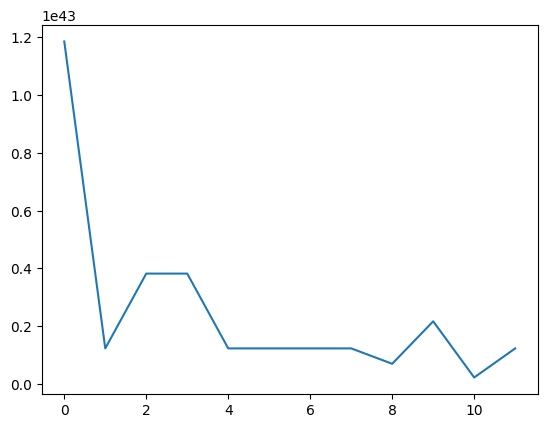

In [67]:
plt.plot(np.arange(len(marr)), marr)

In [28]:
plt.plot(fobs, hc_ss[:,0])

IndexError: invalid index to scalar variable.

In [29]:
print(hc_ss.shape)

()


In [95]:
hsamp = amp
print(hsamp)

[[[[2.92011055e-19 4.63538656e-19 6.07407471e-19 7.35821750e-19
    8.52921227e-19]
   [3.04824418e-20 4.83878602e-20 6.34060341e-20 7.68109401e-20
    8.90347170e-20]
   [4.45214787e-21 7.06734422e-21 9.26084077e-21 1.12187096e-20
    1.30040674e-20]]]


 [[[1.35539525e-17 2.15155585e-17 2.81933574e-17 3.41538202e-17
    3.95890964e-17]
   [1.41486961e-18 2.24596551e-18 2.94304740e-18 3.56524802e-18
    4.13262548e-18]
   [2.06650399e-19 3.28037060e-19 4.29850151e-19 5.20726374e-19
    6.03595338e-19]]]]


In [106]:
temp = np.copy(hsamp)


In [143]:
hsamp=amp
print(hsamp.shape)
print(hsamp)

(24, 24, 24, 5)
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   ...
   [8.46640256e-23 1.34395763e-22 1.76108270e-22 2.13339976e-22
    2.47559113e-22]
   [9.12579470e-23 1.44862961e-22 1.89824179e-22 2.29955617e-22
    2.66839856e-22]
   [1.02348020e-22 1.62467355e-22 2.12892461e-22 2.57900850e-22
    2.99267427e-22]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   ...
   [9.14306427e-23 1.45137098e-22 1.90183401e-22 2.30390783e-22
    2.67344821e-22]
   [9.85515712e-23 1.56440868e-22 2.04995529e-22 2.48334398e-22
    2.88166542e-22]
   [1.10527998e-22 1.75452261e-22 2.29907501

In [144]:
shape = hsamp.shape
newshape = (shape[0]*shape[1]*shape[2], shape[3])
hsamp = hsamp.reshape(newshape) # change hsamp to shape (M*Q*Z, F)
argmax = np.argmax(hsamp, axis=0) # max at each frequency
hsamp = hsamp.reshape(shape) # restore hsamp shape to (M, Q, Z, F)
ssidx3 = np.array(np.unravel_index(argmax, shape[:-1])) # unravel indices


In [145]:
print(ssidx3)

[[20 17 16 14 13]
 [23 23 23 23 23]
 [17 16 18 17 17]]


In [110]:
print(hsamp[tuple(ssidx)])

[[1 0 0 0 0]
 [0 9 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 5]
 [0 0 0 4 5]]


# Timing. What data to store?

In [3]:
%timeit edges, number, fobs, fname = ss.example5()

Number of frequency bins: 24
  between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
using default mtot, mrat, and redz
edges: [array([1.98840987e+37, 2.60119300e+37, 3.40282209e+37, 4.45149521e+37,
       5.82334576e+37, 7.61796975e+37, 9.96565642e+37, 1.30368473e+38,
       1.70545099e+38, 2.23103257e+38, 2.91858655e+38, 3.81802918e+38,
       4.99465977e+38, 6.53390141e+38, 8.54750264e+38, 1.11816504e+39,
       1.46275832e+39, 1.91354748e+39, 2.50325972e+39, 3.27470797e+39,
       4.28389920e+39, 5.60410044e+39, 7.33115796e+39, 9.59045570e+39,
       1.25460181e+40, 1.64124183e+40, 2.14703559e+40, 2.80870360e+40,
       3.67428278e+40, 4.80661396e+40, 6.28790411e+40, 8.22569452e+40,
       1.07606683e+41, 1.40768639e+41, 1.84150362e+41, 2.40901356e+41,
       3.15141727e+41, 4.12261308e+41, 5.39310957e+41, 7.05514445e+41,
       9.22938105e+41, 1.20736684e+42, 1.57945010e+42, 2.06620105e+42,
       2.70295767e+42, 3.53594833e+42, 4.62564796e+42, 6.05116846e+42,
       7.91600228e+4

In [13]:
import holodeck as holo
from holodeck.constants import YR, MSOL

In [17]:
dur = 10.0*YR
cad = .2*YR
%timeit edges, number, fobs = ss.example(dur, cad, mtot=None, mrat=None, redz=None, print_test=False)

using default mtot, mrat, and redz
13:19:26 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
13:19:27 INFO : Stalled SAM bins based on GMT: 1.98e+05/4.99e+05 = 3.96e-01 [sam.py:static_binary_density]
13:19:27 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
13:19:27 INFO : 	dens bef: (1.28e-114, 5.22e-53, 2.59e-13, 2.12e-03, 1.66e-02, 2.92e-02, 4.47e-02) [sam.py:static_binary_density]
13:19:33 INFO : Scatter added after 5.938163 sec [sam.py:static_binary_density]
13:19:33 INFO : 	dens aft: (6.14e-17, 7.92e-09, 2.90e-06, 2.19e-03, 1.69e-02, 2.92e-02, 4.27e-02) [sam.py:static_binary_density]
13:19:33 INFO : 	mass: 8.56e-02 ==> 8.54e-02 || change = -1.8507e-03 [sam.py:static_binary_density]
13:19:33 INFO : zeroing out 1.98e+05/4.99e+05 = 3.96e-01 systems stalled from GMT [sam.py:static_binary_density]
13:19:33 INFO : fraction of coalesced binaries: 4.33e+05/1.25e+07 = 3.47e-02 [sam.py:dynamic_binary_number]
13:19:33 WARNING : WARNING: 

In [5]:
%timeit ss.h2fdf(edges)

146 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
h2fdf = ss.h2fdf(edges)
%timeit cy.ss_bg_hc(number, h2fdf, 30)

20 s ± 580 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
hc_ss, hc_bg, ssidx, hsamp = ss.ss_by_cdefs(edges, number, 30)

In [21]:
%timeit hc_ss, hc_bg, ssidx, hsamp = ss.ss_by_cdefs(edges, number, 30)

20.6 s ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit marr, qarr, zarr, farr = ss.parameters_from_indices(edges, ssidx)
marr, qarr, zarr, farr = ss.parameters_from_indices(edges, ssidx)

16.4 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


function to calculate effective parameters

In [29]:
print(hc_ss.shape)

(25, 30)


In [28]:
print(marr.shape)
print(np.average(marr, axis=1, weights=hc_ss))

(25, 30)
[1.31003488e+43 1.07633983e+43 1.02479984e+43 7.32252891e+42
 5.17051316e+42 5.12361553e+42 4.17369807e+42 4.31707413e+42
 3.47862402e+42 3.06850235e+42 2.95854519e+42 3.04504006e+42
 2.43621625e+42 2.59795251e+42 1.84953646e+42 1.88069818e+42
 1.87589185e+42 1.53198469e+42 1.62893906e+42 1.31654612e+42
 1.74621861e+42 1.17744206e+42 1.18303350e+42 1.17832940e+42
 1.32817693e+42]


In [ ]:
def effective_paramater(arr, hc_ss):
    """ 
    Calculate the average effective binary parameter, given the 
    """
    eff = np.average(arr, axis=1, weights=hc_ss**2)
    return eff

# Parameters in cython

In [2]:
import kalepy as kale
import holodeck.cyutils as cy
import holodeck.single_sources as ss

edges, number, fobs, exname = ss.example5()
h2fdf = ss.h2fdf(edges)
mt = kale.utils.midpoints(edges[0]) #: total mass
mr = kale.utils.midpoints(edges[1]) #: mass ratio
rz = kale.utils.midpoints(edges[2]) #: redshift

Number of frequency bins: 24
  between [0.10, 2.50] 1/yr
          [3.17, 79.22] nHz
using default mtot, mrat, and redz
edges: [array([1.98840987e+37, 2.60119300e+37, 3.40282209e+37, 4.45149521e+37,
       5.82334576e+37, 7.61796975e+37, 9.96565642e+37, 1.30368473e+38,
       1.70545099e+38, 2.23103257e+38, 2.91858655e+38, 3.81802918e+38,
       4.99465977e+38, 6.53390141e+38, 8.54750264e+38, 1.11816504e+39,
       1.46275832e+39, 1.91354748e+39, 2.50325972e+39, 3.27470797e+39,
       4.28389920e+39, 5.60410044e+39, 7.33115796e+39, 9.59045570e+39,
       1.25460181e+40, 1.64124183e+40, 2.14703559e+40, 2.80870360e+40,
       3.67428278e+40, 4.80661396e+40, 6.28790411e+40, 8.22569452e+40,
       1.07606683e+41, 1.40768639e+41, 1.84150362e+41, 2.40901356e+41,
       3.15141727e+41, 4.12261308e+41, 5.39310957e+41, 7.05514445e+41,
       9.22938105e+41, 1.20736684e+42, 1.57945010e+42, 2.06620105e+42,
       2.70295767e+42, 3.53594833e+42, 4.62564796e+42, 6.05116846e+42,
       7.91600228e+4

In [2]:
hc_ss, hc_bg, ssidx, bgpar, sspar = cy.ss_bg_hc_and_par(number, h2fdf, 30, mt, mr, rz)

In [3]:
print(sspar[:,0,0])
print(bgpar[:,0,0])

[6.72902784e+42 9.54258788e-01 5.72725476e-01]
[3.21709576e+42 6.50770638e-01 1.09194891e+00]


In [4]:
print(mt[ssidx[0,0,0]], mr[ssidx[1,0,0]], rz[ssidx[2,0,0]])

6.729027836269378e+42 0.9542587878258433 0.5727254762096192


In [ ]:
%timeit hc_ss, hc_bg, ssidx, bgpar, sspar = cy.ss_bg_hc_and_par(number, h2fdf, 30, mt, mr, rz)

50.2 s ± 350 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit hc_ss, hc_bg, ssidx, hsamp, bgpar, sspar = ss.ss_by_cdefs(edges, number, 30, params=True)

49.8 s ± 387 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%timeit hc_ss, hc_bg, ssidx, hsamp = ss.ss_by_cdefs(edges, number, 30)

20.7 s ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
edges, number, fobs, exname = ss.example2()

Number of frequency bins: 4
  between [0.63, 3.16] 1/yr
          [20.00, 100.00] nHz
edges: [array([1.e+39, 1.e+40, 1.e+41]), array([0.1, 1. ]), array([0.001, 0.01 , 0.1  , 1.   ])]
17:31:25 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
17:31:25 INFO : Stalled SAM bins based on GMT: 1.20e+01/2.40e+01 = 5.00e-01 [sam.py:static_binary_density]
17:31:25 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
17:31:25 INFO : 	dens bef: (1.79e-03, 1.94e-03, 4.00e-03, 7.66e-03, 1.48e-02, 1.53e-02, 1.54e-02) [sam.py:static_binary_density]
17:31:25 INFO : Scatter added after 0.002365 sec [sam.py:static_binary_density]
17:31:25 INFO : 	dens aft: (2.07e-03, 2.12e-03, 4.31e-03, 7.29e-03, 1.38e-02, 1.46e-02, 1.46e-02) [sam.py:static_binary_density]
17:31:25 INFO : 	mass: 1.21e-02 ==> 1.20e-02 || change = -9.0094e-03 [sam.py:static_binary_density]
17:31:25 INFO : zeroing out 1.20e+01/2.40e+01 = 5.00e-01 systems stalled from GMT [sam.py:static_binar

In [25]:
hc_bg, hc_ss, hsamp, ssidx, hsmax, bgnum = ss.ss_by_ndars(edges, number, realize=2)

In [70]:
print(bgnum[:,:,:,2,0])
print(bgnum.shape)
together = np.array([hsamp, bgnum])
print(together.shape)
shape = together.shape
together = together.reshape((shape[0], shape[1]*shape[2]*shape[3], shape[4], shape[5]))
print(together.shape)
print(together[:,:,2,0])
sorted = np.sort(together, axis=1)
print('together\n', together[:,:,2,0])
print('hsort', hsort[:,2,0])
print('bgnum', bgnum.reshape((2*1*3, 5, 2))[:,2,0])
print('sorted hsort', np.sort(hsort, axis=0)[:,2,0])
print('sorted together\n', sorted[:,:,2,0])

[[[       0   138051 17110042]]

 [[       0     1909   222967]]]
(2, 1, 3, 5, 2)
(2, 2, 1, 3, 5, 2)
(2, 6, 5, 2)
[[0.00e+00 6.34e-20 9.26e-21 0.00e+00 2.94e-18 4.30e-19]
 [0.00e+00 1.38e+05 1.71e+07 0.00e+00 1.91e+03 2.23e+05]]
together
 [[0.00e+00 6.34e-20 9.26e-21 0.00e+00 2.94e-18 4.30e-19]
 [0.00e+00 1.38e+05 1.71e+07 0.00e+00 1.91e+03 2.23e+05]]
hsort [0.00e+00 6.34e-20 9.26e-21 0.00e+00 2.94e-18 4.30e-19]
bgnum [       0   138051 17110042        0     1909   222967]
sorted hsort [0.00e+00 0.00e+00 9.26e-21 6.34e-20 4.30e-19 2.94e-18]
sorted together
 [[0.00e+00 0.00e+00 9.26e-21 6.34e-20 4.30e-19 2.94e-18]
 [0.00e+00 0.00e+00 1.91e+03 1.38e+05 2.23e+05 1.71e+07]]


In [49]:
np.set_printoptions(precision=2)
print(hsamp.shape)
print(hsamp[:,:,:,2,0]) #0th realization, 2nd frequency
shape = hsamp.shape
hsort = hsamp.reshape(shape[0]*shape[1]*shape[2], shape[3], shape[4])
print(hsort[:,2,0])
print(np.sort(hsort, axis=0)[:,2,0])

(2, 1, 3, 5, 2)
[[[0.00e+00 6.34e-20 9.26e-21]]

 [[0.00e+00 2.94e-18 4.30e-19]]]
[0.00e+00 6.34e-20 9.26e-21 0.00e+00 2.94e-18 4.30e-19]
[0.00e+00 0.00e+00 9.26e-21 6.34e-20 4.30e-19 2.94e-18]


In [43]:
# shape (M, Q, F)
# sort over any M and Q for each individual F
# first frequency: m1,q1,f1 = 5; m1q2,f1 = 4, m2q1,f1 = 6, m2q2,f1 = 3
# second frequency: m1,q1,f2 = 20, m1q2f2 = 35, m2q1f2 = 10, m2q2f2 = 11
# order by first all frequencies of m1 q1, then all q1s for m1, 
test = np.array([[[5,20], [4,35]], [[6,10], [3,11]]])
goal = np.array([[3, 4, 5, 6], [10,11,20,35]])
print(test)
print(test.reshape((2*2, 2)))
print(np.sort(test.reshape(2*2, 2), axis=0))
# print(np.sort(test, axis=0))
# print(goal)

[[[ 5 20]
  [ 4 35]]

 [[ 6 10]
  [ 3 11]]]
[[ 5 20]
 [ 4 35]
 [ 6 10]
 [ 3 11]]
[[ 3 10]
 [ 4 11]
 [ 5 20]
 [ 6 35]]


In [44]:
print(grid)

[[[[1 0 0 0 0]
   [0 9 0 0 0]
   [0 0 0 0 0]]]


 [[[0 0 0 0 0]
   [0 0 3 0 0]
   [0 0 0 4 5]]]]


In [ ]:
print(hsamp[])